<a href="https://colab.research.google.com/github/itzem-vg/Practicos-SIS420-COM200/blob/main/Lab4/LAB4_reg_log_onevsall-IEVG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación multiclase Laboratorio 4

## Datos

Universitaria: Itzel Emily Velasquez Guerra

El dataset utilizado es sobre:
NOMBRE--Encuesta digital del cielo de Sloan: DR18
Datos sobre objetos celestes del Sloan Digital Sky Survey: publicación de datos n.° 18

DATASET UTULIZADO: [Dataset-SDSS_DR18.csv](https://drive.google.com/file/d/1ILaDAaq9iETPvLvfcNJyN-YQ04VnW9Xm/view?usp=sharing)

ENLACE A KAGGLE: [Encuesta digital del cielo de Sloan: DR18](https://www.kaggle.com/datasets/diraf0/sloan-digital-sky-survey-dr18)





In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize


# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [189]:
#Manipulacion y analisis de datos
import pandas as pd

#Esta funcion se utiliza para dividir un conjunto de datos
# en dos subconjuntos, uno para entrenamiento y otro para prueba
from sklearn.model_selection import train_test_split


#Se utiliza para codificar etiquetas categoricas en forma numerica
from sklearn.preprocessing import LabelEncoder

## 1 Clasificación multiclase

Para este ejercicio, se usará regresión logística y redes neuronales para reconocer dígitos escritos a mano (de 0 a 9).
Extenderá la implementación anterior de la regresión logística y la aplicará a la clasificación de uno contra todos (one vs all).

### 1.1 Dataset

Nombre: Encuesta digital del cielo de Sloan: DR18


"y" sera el TIPO (Tipo de objeto celeste)
Donde tenemos 3 tipos aproximadamente:
  Galaxia -
  Estrella -
  QSO



Para comenzar, cargamos los datos ;)

In [190]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Dataset-SDSS_DR18.csv', delimiter=',')
df = pd.DataFrame(data)

In [191]:
display(data)

,objid,specobjid,ra,dec,u,g,r,i,z,camcol - Número de columna de la cámara,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,5,...,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,5,...,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,5,...,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,5,...,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,5,...,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1.240000e+18,1.070000e+18,153.926058,55.667486,15.98073,14.32413,13.55819,13.19878,12.85751,3,...,16.51046,17.28842,16.19257,15.80002,0.823862,0.852807,0.858731,0.843424,0.828672,GALAXY
99995,1.240000e+18,3.580000e+18,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,3,...,18.01472,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,STAR
99996,1.240000e+18,3.580000e+18,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,3,...,17.79733,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,STAR
99997,1.240000e+18,1.070000e+18,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,3,...,18.14792,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,GALAXY


In [192]:
#verificar informacion de su tipo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   objid                                    99999 non-null  float64
 1   specobjid                                99999 non-null  float64
 2   ra                                       99999 non-null  float64
 3   dec                                      99999 non-null  float64
 4   u                                        99999 non-null  float64
 5   g                                        99999 non-null  float64
 6   r                                        99999 non-null  float64
 7   i                                        99999 non-null  float64
 8   z                                        99999 non-null  float64
 9   camcol - Número de columna de la cámara  99999 non-null  int64  
 10  fiberid                                  99999

Eliminamos las dos primeras columnas --> `inplace=True`, indica que la eliminación se realizará directamente en el DataFrame data




In [193]:
# eliminamos las dos primeras columnas
data.drop(['objid', 'specobjid'], axis=1, inplace=True)

### Transformacion de datos de tipo `objets` a valores numericos

In [194]:
#TRANSFORMACION DE COLUMNAS - categoricas a numericas - selecionando las columnas del dataset de tipo object
columnas_categoricas = data.select_dtypes(include=['object']).columns

#El for recorrera cada columna categorica
for columna in columnas_categoricas:
  #El LabelEncoder se utiliza para codificar las etiquetas categóricas como valores numéricos
  le = LabelEncoder()

  #fil_tranform es el que CAMBIA a valores ENTERO 0,1,2,3 de acuerdo a la cantidad de tipos de hay
  data[columna] = le.fit_transform(data[columna])

In [195]:
display(data)

,ra,dec,u,g,r,i,z,camcol - Número de columna de la cámara,fiberid,petroRad_u,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,5,456,7.282402,...,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,5,322,1.335305,...,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,2
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,5,614,3.874802,...,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,5,414,1.251496,...,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,2
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,5,403,1.365736,...,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,153.926058,55.667486,15.98073,14.32413,13.55819,13.19878,12.85751,3,155,22.550620,...,16.51046,17.28842,16.19257,15.80002,0.823862,0.852807,0.858731,0.843424,0.828672,0
99995,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,3,320,9.782383,...,18.01472,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,2
99996,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,3,317,1.447653,...,17.79733,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,2
99997,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,3,153,6.156346,...,18.14792,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,0


In [196]:
#VEMOS LA UBICACION DE LA COLUMAN Y
data.columns.get_loc("class")


34

In [197]:
value_counts = data["class"].value_counts()
print(value_counts)

class
0    52342
2    37232
1    10425
Name: count, dtype: int64


In [198]:
# Debemos saber el num de caracteristicas en los datos de entrada
num_caracteristicas = data.shape[1]
print(f'Número de características: {num_caracteristicas}')

Número de características: 35


In [199]:
# La entrada es de 14 elemento contando con x0 No muy importante
input_layer_size  = 14
num_labels = 3 #catidad de ETIQUETAS

In [200]:
#Solo vamos a trabajar con 20.000 datos de las columnas respectivamente asignadas

X = data.iloc[:20000, [1,3,4,5,6,7,9,10,11,12,13,14]].values
#X = data.iloc[:20000, :-1].values
y = data.iloc[:20000, 34].values


#En nuestro data set solo hay las categorias de 0 a 2, por eso no aplicamos la siguiente funcion
#y[y == 3] = 0

m = y.size
#display(X,y)

In [201]:
print(X[1,:])
print(y)

[ 0.67970391 19.92153    20.34448    20.66213    20.59599     5.
  1.335305    1.321027    1.167182    1.266144    0.9664313  14.55308   ]
[0 2 0 ... 0 0 1]


### 1.1.1 Division de 80% de entrenamiento y 20% de prueba - Separados por los tipos de clases

Dividimos los datos de nuestro data set, donde el 80% sera utilizado para entrenamiento y el 20% restante sera de prueba. Para tener una division mas igualitaria por cada CLASE, por eso dividimos de acuerdo a su clase

In [202]:
y_tem = data["class"]

#Separamos el 20% para prueba de acuerdo a su tipo de CLASE
data_class_0 = data[y_tem == 0]
train_class_0, test_class_0 = train_test_split(data_class_0, test_size=0.2, random_state=42)

data_class_1 = data[y_tem == 1]
train_class_1, test_class_1 = train_test_split(data_class_1, test_size=0.2, random_state=42)

data_class_2 = data[y_tem == 2]
train_class_2, test_class_2 = train_test_split(data_class_2, test_size=0.2, random_state=42)



In [203]:
#Queremos visualizar la cantidad de datos que habra por cada Clase
print("Clase 0 se tiene la cantidad de: ",data_class_0.shape[0], "El 80 %: ", train_class_0.shape[0], "---el 20 %: ", test_class_0.shape[0])
print("Clase 1 se tiene la cantidad de: ",data_class_1.shape[0], "El 80 %: ", train_class_1.shape[0], "---el 20 %: ", test_class_1.shape[0])
print("Clase 2 se tiene la cantidad de: ",data_class_2.shape[0], "El 80 %: ", train_class_2.shape[0], "---el 20 %: ", test_class_2.shape[0])
print("la cantidad total de datos es: ", data.shape[0])

Clase 0 se tiene la cantidad de:  52342 El 80 %:  41873 ---el 20 %:  10469
Clase 1 se tiene la cantidad de:  10425 El 80 %:  8340 ---el 20 %:  2085
Clase 2 se tiene la cantidad de:  37232 El 80 %:  29785 ---el 20 %:  7447
la cantidad total de datos es:  99999


In [204]:
#ASIGNAMOS LOS VALORES para X - Y, de acuerdo a la categoria para cada clase
#Tambien eliminamos la columna Class (la Y), para evitar problemas luego
X_train_class_0 = train_class_0.drop("class", axis=1)
y_train_class_0 = train_class_0["class"]

X_train_class_1 = train_class_1.drop("class", axis=1)
y_train_class_1 = train_class_1["class"]

X_train_class_2 = train_class_2.drop("class", axis=1)
y_train_class_2 = train_class_2["class"]

X_test_class_0 = test_class_0.drop("class", axis=1)
y_test_class_0 = test_class_0["class"]

X_test_class_1 = test_class_1.drop("class", axis=1)
y_test_class_1 = test_class_1["class"]

X_test_class_2 = test_class_2.drop("class", axis=1)
y_test_class_2 = test_class_2["class"]

### Concatenacion de datos
Estas líneas concatenan (unen) los datos de entrenamiento de las diferentes clases (0, 1 y 2) en un solo conjunto de datos.

In [205]:
#Como estamos trabajando de manera clasificada en sus clases, vamos uniendo los datos
X_train = pd.concat([X_train_class_0, X_train_class_1, X_train_class_2]).values
y_train = pd.concat([y_train_class_0, y_train_class_1, y_train_class_2]).values

indices_train = np.random.permutation(len(X_train))
X_train = X_train[indices_train]
y_train = y_train[indices_train]
m_train = X_train.shape[0]


X_test = pd.concat([X_test_class_0, X_test_class_1, X_test_class_2]).values
y_test = pd.concat([y_test_class_0, y_test_class_1, y_test_class_2]).values

#Estas líneas mezclan aleatoriamente los datos de entrenamiento
#Evitamos que el modelo aprenda un orden específico en los datos
indices_test = np.random.permutation(len(X_test))
X_test = X_test[indices_test]
y_test = y_test[indices_test]

#Obtenemos del tamaño del conjunto de entrenamiento
m_test = X_test.shape[0]

In [206]:
#Imrpimimos la catidad y datos en general de nuestro dataset (Aplicando los cambios realizados)

print("Datos de entrenamiento = ", len(X_train))
print("Datos de pruebas = ", len(X_test))
print("Total de caracteristicas = ", X_train.shape[1])
print("Total de etiquetas = ", num_labels)
print("Total de ejemplos = ", data.shape[0])

Datos de entrenamiento =  79998
Datos de pruebas =  20001
Total de caracteristicas =  34
Total de etiquetas =  3
Total de ejemplos =  99999


### 1.1.2 Normalizamos las características

Realizamos una copia para almacenar los datos y así guardarlos dentro de un vector que contendrá la media de cada característica.

In [207]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [208]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [209]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape #SACAMOS DIMENCIONES

X = X_norm


<a id="section1"></a>
#### 1.3.1 Vectorización de la funcion de costo y del gradiente



In [210]:
def sigmoid(z):
    #EXPLICARRRRRR
    #z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

print(sigmoid(0))

0.5


In [211]:
def lrCostFunction(theta, X, y, lambda_):
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    J = (1 / m) * np.sum(-y.dot(np.log(h + 1e-10)) - (1 - y).dot(np.log(1 - h + 1e-10))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

<a id="section2"></a>
### 1.4 Clasificacion One-vs-all
En esta parte del ejercicio, se implementará la clasificación de uno contra todos mediante el entrenamiento de múltiples clasificadores de regresión logística regularizados, uno para cada una de las clases .minimize` de scipy para este ejercicio.
<a id="oneVsAll"></a>

In [212]:
def oneVsAll(X, y, num_labels, lambda_):

    # algunas variables utiles
    m, n = X.shape
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Esto agrega la columna de unos

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    #X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [213]:
num_classes = len(np.unique(y))
print("Número de clases:", num_classes)


Número de clases: 3


In [214]:
lambda_ = 0.5
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)


(3, 13)


In [215]:
print("Tamaño actual de all_theta:", all_theta.size)
print("Dimensiones requeridas:", num_classes)


Tamaño actual de all_theta: 39
Dimensiones requeridas: 3


In [216]:
print(all_theta)

[[ 1.13299051  0.04528216  1.50538259  0.86389136 -0.54384253 -1.74502579
  -0.02037598  0.26483259  0.24719528  0.25779803  6.42194476  0.20106473
  -1.17284199]
 [-4.60838284  0.1029486   2.15510628  1.50925969  0.65199455 -1.48759599
  -0.09642291 -0.14972268 -0.15800718 -0.50667476 -0.99647467  0.02107452
   0.53485883]
 [-2.41431826 -0.09479018 -1.99055727 -2.12266698 -0.8608883   2.88571976
   0.12534602 -0.19139565 -0.22090786 -0.17152445 -7.52389815 -0.20517929
  -0.27328014]]


In [217]:
print(all_theta.shape)


(3, 13)


<a id="section3"></a>
#### 1.4.1 Prediccion One-vs-all

Después de entrenar el clasificador de one-vs-all. La función de predicción one-vs-all seleccionará la clase para la cual el clasificador de regresión logística correspondiente genera la probabilidad más alta y devolverá la etiqueta de clase

In [218]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Agregar unas a la matriz de datos X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1) #nos muestra al que tiene mayor probabilidad GRACIAS A LA SIGMOIDE, y el ARGMAX SERIA EL MAYOR

    return p

Llama a la función `predictOneVsAll` usando el valor aprendido de $\theta$.
Para Calcular la Presicion

In [219]:
print(X.shape)

#num_classes = 24 # Ejemplo: Si tienes 35 clases

num_features = all_theta.size // num_classes

pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))


XPrueba = X[10:150, :].copy()
print(XPrueba.shape)

XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[10:150])

(20000, 12)
Precision del conjuto de entrenamiento: 93.81%
(140, 12)
(140, 13)
[2 2 2 2 2 2 2 0 2 2 1 0 0 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 0 0 1 2 2 0 0 0 0
 2 0 2 2 0 0 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 2 2 2 2 2
 2 0 0 0 2 1 2 2 2 2 2 0 0 2 0 0 0 0 2 2 0 2 2 2 2 0 2 2 2 0 0 2 0 0 0 2 2
 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 2 2 2 0 2 2 2 0 2 2 0 2 2 2]
[2 2 2 2 2 2 2 0 2 2 1 0 0 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 0 0 1 2 2 0 0 0 0
 2 0 2 2 0 0 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 2 2 2 2 1
 2 0 0 0 2 1 2 2 2 2 2 0 0 2 0 0 0 0 2 2 0 2 2 2 2 0 2 2 2 0 0 2 0 0 0 2 2
 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 2 2 2 0 2 2 2 0 2 2 0 2 2 2]


## Graficamos el costo

In [220]:
def lrCostFunctionGraf(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(X @ theta)
    J = (1/m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return J


In [221]:

def train_with_cost_tracking(X, y, theta, lambda_, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        # Actualiza theta usando el algoritmo de descenso de gradiente
        gradient = (1/m) * (X.T @ (sigmoid(X @ theta) - y))
        theta = theta - alpha * gradient

        # Guarda el costo de la iteración actual
        J_history.append(lrCostFunctionGraf(theta, X, y, lambda_))

    return theta, J_history


<ipython-input-220-c68f3de42a96>:4: RuntimeWarning: divide by zero encountered in log
  J = (1/m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
<ipython-input-220-c68f3de42a96>:4: RuntimeWarning: invalid value encountered in matmul
  J = (1/m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
<ipython-input-210-d04057940b1b>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


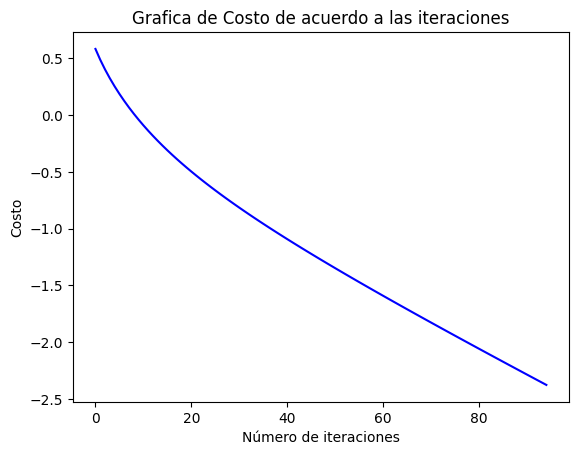

In [222]:
def plot_cost(J_history):
    pyplot.plot(range(len(J_history)), J_history, 'b')
    pyplot.xlabel('Número de iteraciones')
    pyplot.ylabel('Costo')
    pyplot.title('Grafica de Costo de acuerdo a las iteraciones')
    #plt.grid(True)
    pyplot.show()

# Llamamos a la función de entrenamiento y graficar el costo
theta = np.zeros(X.shape[1])
alpha = 0.1
num_iters = 10000
lambda_ = 0.01

theta, J_history = train_with_cost_tracking(X, y, theta, lambda_, alpha, num_iters)
plot_cost(J_history)


In [223]:
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))

Precision del conjuto de entrenamiento: 93.81%
